# ToDO
- add thermal v0 instead of v0=0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt
from tqdm.notebook import tqdm

In [3]:
def V(x, dV):
    return -6*dV*(x**3/3+x**2/2)

# from f=- \Nabla V
def f(x, dV):
    return 6 * dV * (x**2 + x)
    
def p(x, dV, T=0.25):
    return exp(-V(x, dV)/(T))

def rand(mu=0, si=1):
    return np.random.normal(loc=mu, scale=si)

def v_reset(stdv):
    return rand(0,stdv)

# a)

In [32]:
deltaV=10
gamma=1
T=0.25
x0=-1
v0=0
dt=0.01
t_max=1000
Nt=int(t_max/dt)
tarr=np.linspace(0,t_max, num=Nt)*dt
print(f"nr. of iterations: {Nt}")
m=1
sigma=sqrt(2*T*gamma/m)
print(f"simga={sigma}")

nr. of iterations: 100000
simga=0.7071067811865476


In [33]:
xs=np.zeros(Nt)
xs[0] = x0
vs=np.zeros(Nt)
vs[0] = v0
ps=[p(x0,deltaV,T)]

for i in tqdm(range(Nt-1)):

    xi = xs[i]
    vi = vs[i]
    Xi = rand()
    Theta = rand()
    fi = f(xi, deltaV)
    
    Ci = dt**2/2 * (fi - gamma*vi) + sigma*dt**(3/2)*(Xi/2+Theta/(2*sqrt(3)))
     
    x_new = xi + dt*vi + Ci 
    f_new = f(x_new, deltaV)
    
    v_new = vi + dt/2*(f_new+fi)- dt*gamma*vi+sigma*sqrt(dt)*Xi-gamma*Ci
    
    xs[i+1] = x_new
    vs[i+1] = v_new
    
    if x_new>1:
        print(f"we out! at {i*dt}")
        break

  0%|          | 0/99999 [00:00<?, ?it/s]

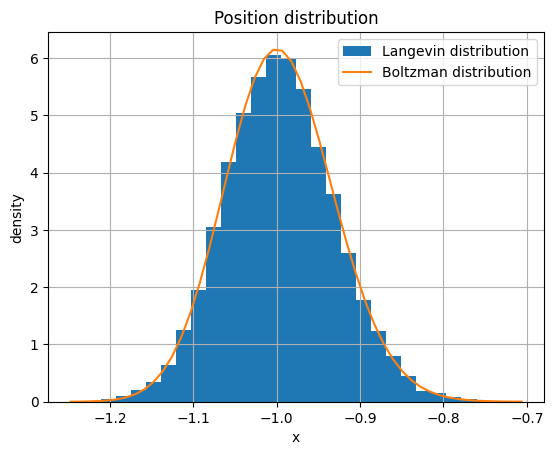

In [34]:
xarr = np.linspace(min(xs), max(xs))
ps = [p(i, deltaV) for i in xarr]
ps = ps/np.trapezoid(ps, xarr) 

plt.hist(xs, bins=30, density=True, label="Langevin distribution")
plt.plot(xarr, ps, label="Boltzman distribution")
plt.grid()
plt.title("Position distribution")
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("x")
plt.ylabel("density")
plt.show();
# max(ps)/1e17

# b)

In [37]:
deltaV=1
gamma=1
T=0.5
N_particles = int(1e4)
x0=-1
dt=0.01
t_max=300
v0=0
Nt=int(t_max/dt)
print(f"nr. of iterations: {Nt}")
print(f"nr. of particles: {N_particles}")
m=1
measure_f = 5
sigma=sqrt(2*T*gamma/m)



nr. of iterations: 30000
nr. of particles: 10000


In [ ]:
resets = 0
resets_i = []
measure_x = []
measure_v = []
for p in tqdm(range(N_particles)):
    xp = np.zeros(Nt)
    xp[0] = x0
    vp = np.zeros(Nt)
    vp[0] = v0

    for i in range(Nt - 1):

        xi = xp[i]
        vi = vp[i]
        Xi = rand()
        Theta = rand()
        fi = f(xi, deltaV)

        Ci = dt**2 / 2 * (fi - gamma * vi) + sigma * dt ** (3 / 2) * (
            Xi / 2 + Theta / (2 * sqrt(3))
        )

        x_new = xi + dt * vi + Ci
        
        if x_new > 0.5:
            x_new = x0
            v_new = v0
            resets += 1
            resets_i.append(i)
        else:
            f_new = f(x_new, deltaV)

            v_new = (vi
                + dt / 2 * (f_new + fi)
                - dt * gamma * vi
                + sigma * sqrt(dt) * Xi
                - gamma * Ci)

        xp[i + 1] = x_new
        vp[i + 1] = v_new
        
        if i%measure_f==0:
            measure_v.append(v_new)
            measure_x.append(x_new)


  0%|          | 0/10000 [00:00<?, ?it/s]

nr. of particle resets: 112735


In [39]:
print(f"nr. of particle resets: {resets}")
print(f"average resets per particle: {resets/N_particles}")

nr. of particle resets: 112735
average resets per particle: 11.2735
